Famous statistician John Tukey once said,

> **Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone.**

In [1]:
from sklearn.datasets import load_iris
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import get_configdir

In [41]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [45]:
plt.style.use('ggplot')

Set seaborn style for plotting

In [34]:
sbn.set(palette='muted', style='darkgrid')

Load iris data

In [5]:
iris = load_iris()

In [6]:
print('The names of features in the Iris dataset are: \n{}'.format(iris.feature_names))

The names of features in the Iris dataset are: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print('The classes in the target variable are: {}'.format(iris.target_names))

The classes in the target variable are: ['setosa' 'versicolor' 'virginica']


See what the data looks like

In [8]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

Count of each class type

In [9]:
np.bincount(iris.target)

array([50, 50, 50], dtype=int64)

I want to plot the histogram of versicolor petal lengths. So for that, I need to get the rows which belong to class versicolor(index 1) and extract the petal length (index 2) from it.

In [10]:
# index in target numpy array whose value is 1 (versicolor)

ix=np.where(iris.target == 1)[0]

print('Row indexes where class is versicolor: \n\n{} '.format(ix))

versicolor = iris.data[ix]

Row indexes where class is versicolor: 

[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99] 


Extract the third column (petal length) from the rows belonging to versicolor

In [11]:
versicolor_petal_length = np.take(versicolor, 2, axis=1)
versicolor_petal_length

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

Similarly, get the petal lengths for setosa and virginica too!

In [36]:
ix = np.where(iris.target == 0 )[0]
setosa = iris.data[ix]
setosa_petal_length = np.take(setosa, 2, axis=1)

ix = np.where(iris.target == 2 )[0]
virginica = iris.data[ix]
virginica_petal_length = np.take(virginica, 2, axis=1)

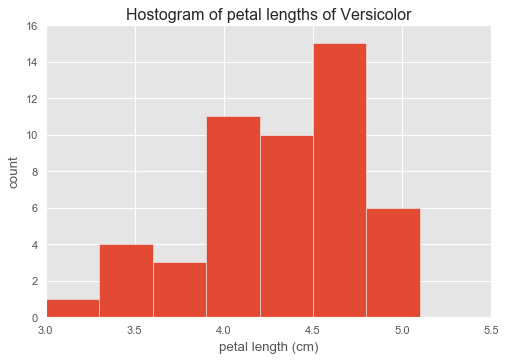

In [47]:
_ = plt.hist(versicolor_petal_length, bins=int(np.sqrt(len(versicolor_petal_length))))
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
_ = plt.title('Hostogram of petal lengths of Versicolor')

## Beeswarm Plot

Let's create a dataframe from the iris data first.

In [24]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

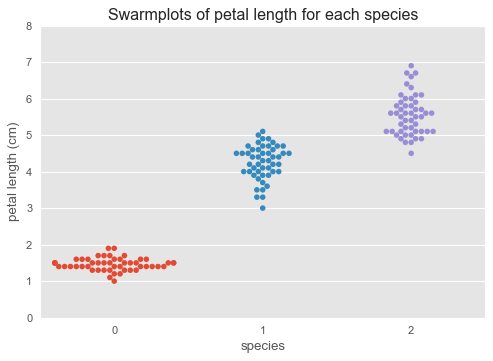

In [48]:
_ = sbn.swarmplot(x='species', y = 'petal length (cm)', data=df)
_ = plt.title('Swarmplots of petal length for each species')

## Empirical Cumulative ditribution function (ECDF)

In [27]:
def ecdf(data):
    """
    compute ECDF for a one dimensional array of measurements.
    The y data of the ECDF go from 1/n to 1 in equally spaced increments.
    the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1
    """
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1) / n
    return x,y

Plot ECDF of versicolor petal lengths.

In [28]:
x_vers, y_vers = ecdf(versicolor_petal_length)

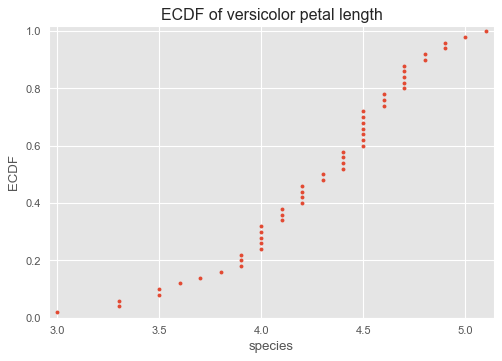

In [49]:
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('species')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of versicolor petal length')
plt.show()

Let's plot ECDF for all species for comparison.

In [37]:
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

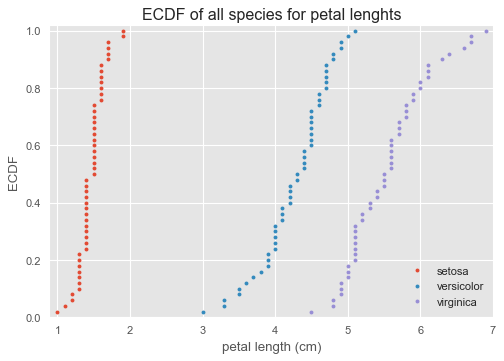

In [50]:
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')
plt.margins(0.02)
plt.legend(('setosa', 'versicolor', 'virginica'), loc='best')
_ = plt.title('ECDF of all species for petal lenghts')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
plt.show()

Mean, Median and

In [53]:
mean_length_versicolor = np.mean(versicolor_petal_length)
print('Mean versicolor petal length: ', mean_length_versicolor, 'cm')

Mean versicolor petal length:  4.26 cm


## Box Plots

The center line of the box corresponds to the 50th percentile. The lower and upper edge of the box to the 25th and 75th percentile respectively. The space between the two thus represents the middle 50% of the data and known as the Inter Quantile Range (IQR). The whiskers are present at a distance of 1.5 * IQR or the extent of the data whichever is less extreme. All points outside the whisker are plotted as individual points and considered outliers.

You should NOT assume an outlier is irroneous unless there's reason to do so.